#Problem 3: Learning a data-driven Linear Dynamical System (LDS)

##Part E:
Now run the jPCA algorithm on the same data. Look at the code and notes provided
by the authors and find the right lines of code to run on the dataset. Find the learned dynamics and project the data forward as with Part D. Use “subplot” to plot the projected neural activity next to each other. What key differences do you see between the dynamics? What differences between the dynamical system matrices do you see? Are there similarities or differences e.g., in the eigenspectra?

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


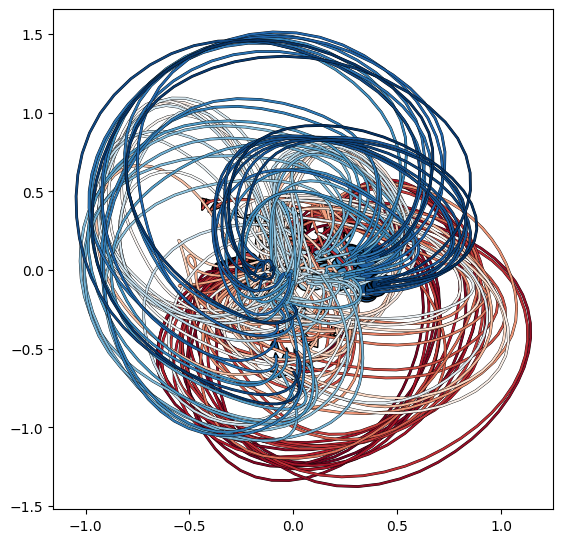

In [ ]:
!git clone https://github.com/bantin/jPCA.git
import os
os.chdir('jPCA')
!pip install .

from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import jPCA
from jPCA.util import load_churchland_data, plot_projections

# Find the file in google drive
drive.mount('/content/drive')
file = "/content/drive/MyDrive/Neural_Signals_and_Computation_HW2/exampleData.mat"

import scipy.io as sio
mat_contents = sio.loadmat(file)
data = mat_contents['Data']
# Data is the struct (length = 1)
# Data[c] is the condition (length = 108)
# Data[c][o] are the fields options (length = 2)
# Data[c][o][0] is the A matrix (shape = (61, 218))
# Data[c][o][1] is the time (shape = (61, 1))
datas = []
for c in range(len(data[0])):
  datas.append(data[0][c][0])
times = np.arange(-50, 560, 10).tolist()

# Create a jPCA object
jpca = jPCA.JPCA(num_jpcs=6)

# Fit the jPCA object to data
(projected,
 full_data_var,
 pca_var_capt,
 jpca_var_capt) = jpca.fit(datas, times=times, tstart=-50, tend=550)

# Plot the projected data
plot_projections(projected)

The initial start of both Part D and Part E are quite similar, where they represent the rotational aspect of jPCA, however in their case for their implementation, they are representing the data further in time and showing the full dynamics forward in the principal component space. Their full matrices are similar to the values we arrived to, using the same for PCA, but they instead use utility functions with regressions to solve for the rest of the case. Overall, some other key differences are the tighter rotations and color changes in their representation of the data compared to what was found in Part D.